Missing values: 0
Duplicate rows: 1081
Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


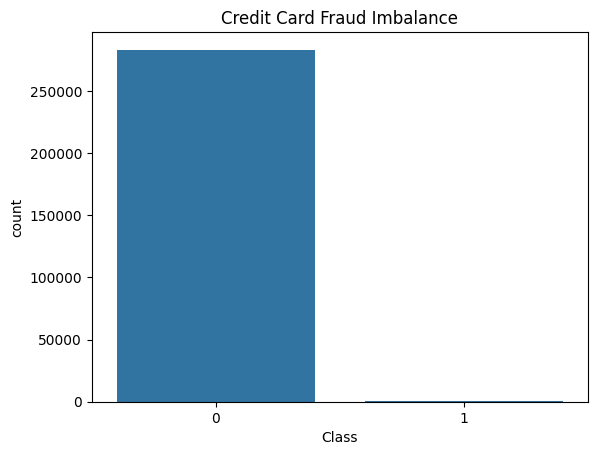

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

credit = pd.read_csv('../data/raw/creditcard.csv')

# --- UPDATE: Data Cleaning ---
# Check for missing values and duplicates
print(f"Missing values: {credit.isnull().sum().max()}")
print(f"Duplicate rows: {credit.duplicated().sum()}")
credit = credit.drop_duplicates()

# --- UPDATE: Scaling ---
# 'Time' and 'Amount' need scaling to match PCA features V1-V28
# RobustScaler is used because fraud data often contains extreme outliers in Amount
rob_scaler = RobustScaler()
credit['scaled_amount'] = rob_scaler.fit_transform(credit['Amount'].values.reshape(-1,1))
credit['scaled_time'] = rob_scaler.fit_transform(credit['Time'].values.reshape(-1,1))

# Remove original unscaled columns
credit.drop(['Time', 'Amount'], axis=1, inplace=True)

# Check Imbalance
print(credit['Class'].value_counts(normalize=True))

# Visualize
sns.countplot(x='Class', data=credit)
plt.title('Credit Card Fraud Imbalance')
plt.show()

# Save processed data
credit.to_csv('../data/processed/creditcard_cleaned.csv', index=False)

In [3]:
fraud_pc = (credit['Class'].value_counts(normalize=True)[1]) * 100
print(f"Credit Card Fraud Percentage: {fraud_pc:.4f}%")

Credit Card Fraud Percentage: 0.1667%
